In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pickle
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")  # Suppresses all warnings

In [28]:
df= pd.read_csv(r"D:\LuxDev\ClassModels\train.csv")
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [5]:
df.describe()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,565.405000,85779.287500,27795.651250,36.315000,8.732238,29.812500,16.376250,48850.921250,42.443750,4529.968687
std,159.528109,37972.705711,12819.525021,17.163012,3.670453,11.626346,10.036339,29785.455545,15.011446,2567.048232
min,300.000000,20060.000000,5097.000000,12.000000,2.510000,10.000000,0.000000,28.000000,18.000000,49.757940
25%,426.750000,53056.250000,16136.000000,24.000000,5.537500,19.925000,8.000000,21359.750000,29.000000,2377.592064
50%,553.000000,85105.000000,28518.500000,36.000000,8.725000,29.645000,16.000000,47314.500000,42.000000,4379.666025
75%,702.000000,118776.000000,38539.750000,48.000000,11.915000,40.005000,25.000000,76191.000000,55.250000,6821.026905
max,849.000000,149972.000000,49976.000000,60.000000,14.990000,49.910000,34.000000,99976.000000,69.000000,9113.843128


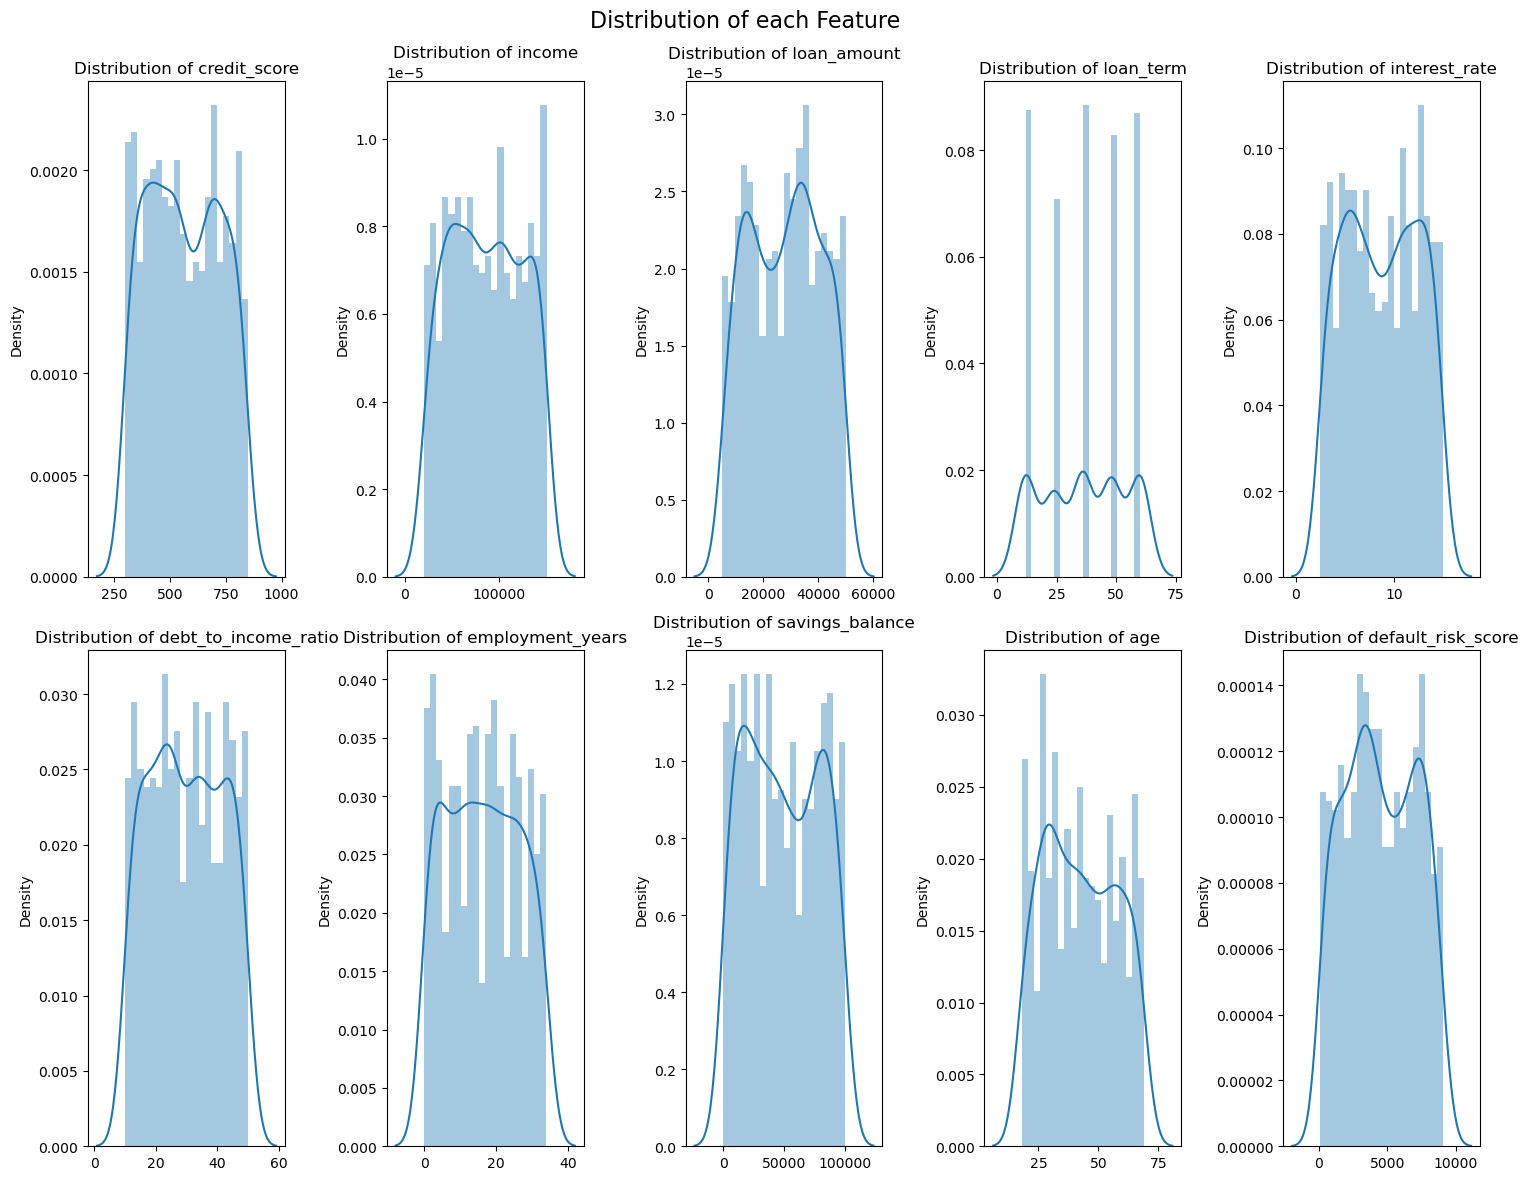

In [7]:
#set up the figure with subplots
fig, axes=plt.subplots(nrows=2, ncols=5, figsize=(15,12))
axes= axes.flatten()
#plot each features distribution
for i, column in enumerate(df.columns):
    sns.distplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel("")
plt.suptitle("Distribution of each Feature", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [30]:
#standard scale
scaler= StandardScaler()
scaled_feat= ['loan_term', 'interest_rate', 'debt_to_income_ratio', 'employment_years', 'age']
df[scaled_feat]= scaler.fit_transform(df[scaled_feat])
#Log transfrorm credit_score, income, loan amount, savings balance & default risk score
log_feat= ['credit_score', 'income', 'loan_amount', 'savings_balance', 'default_risk_score']
df[log_feat]= np.log1p(df[log_feat])

In [32]:
#Split the data
target= "default_risk_score"
X= df.drop(columns=[target])
y= df[target]

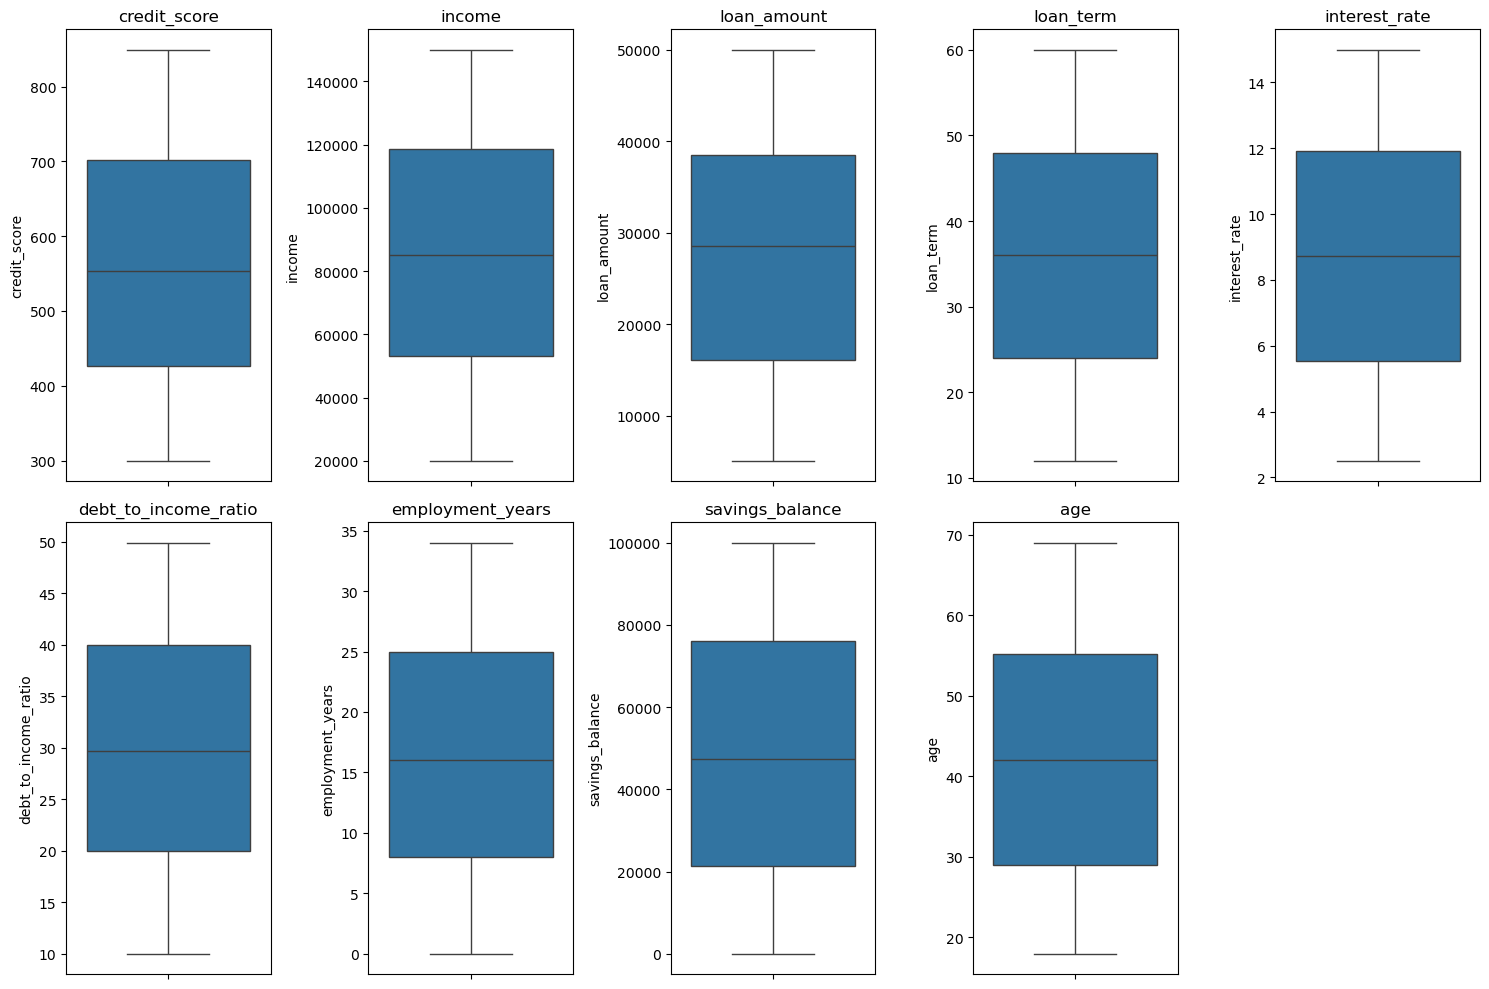

In [11]:
#Create a box plot for the features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    # plt.xlabel("Default Risk Score")
    plt.ylabel(X.columns[i])
plt.tight_layout();

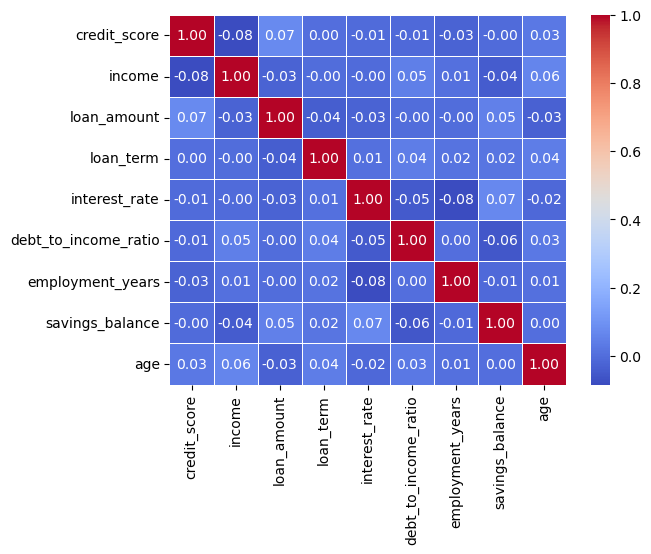

In [13]:
#Plot a heatmap to check for multicolinearity
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidth=0.5);

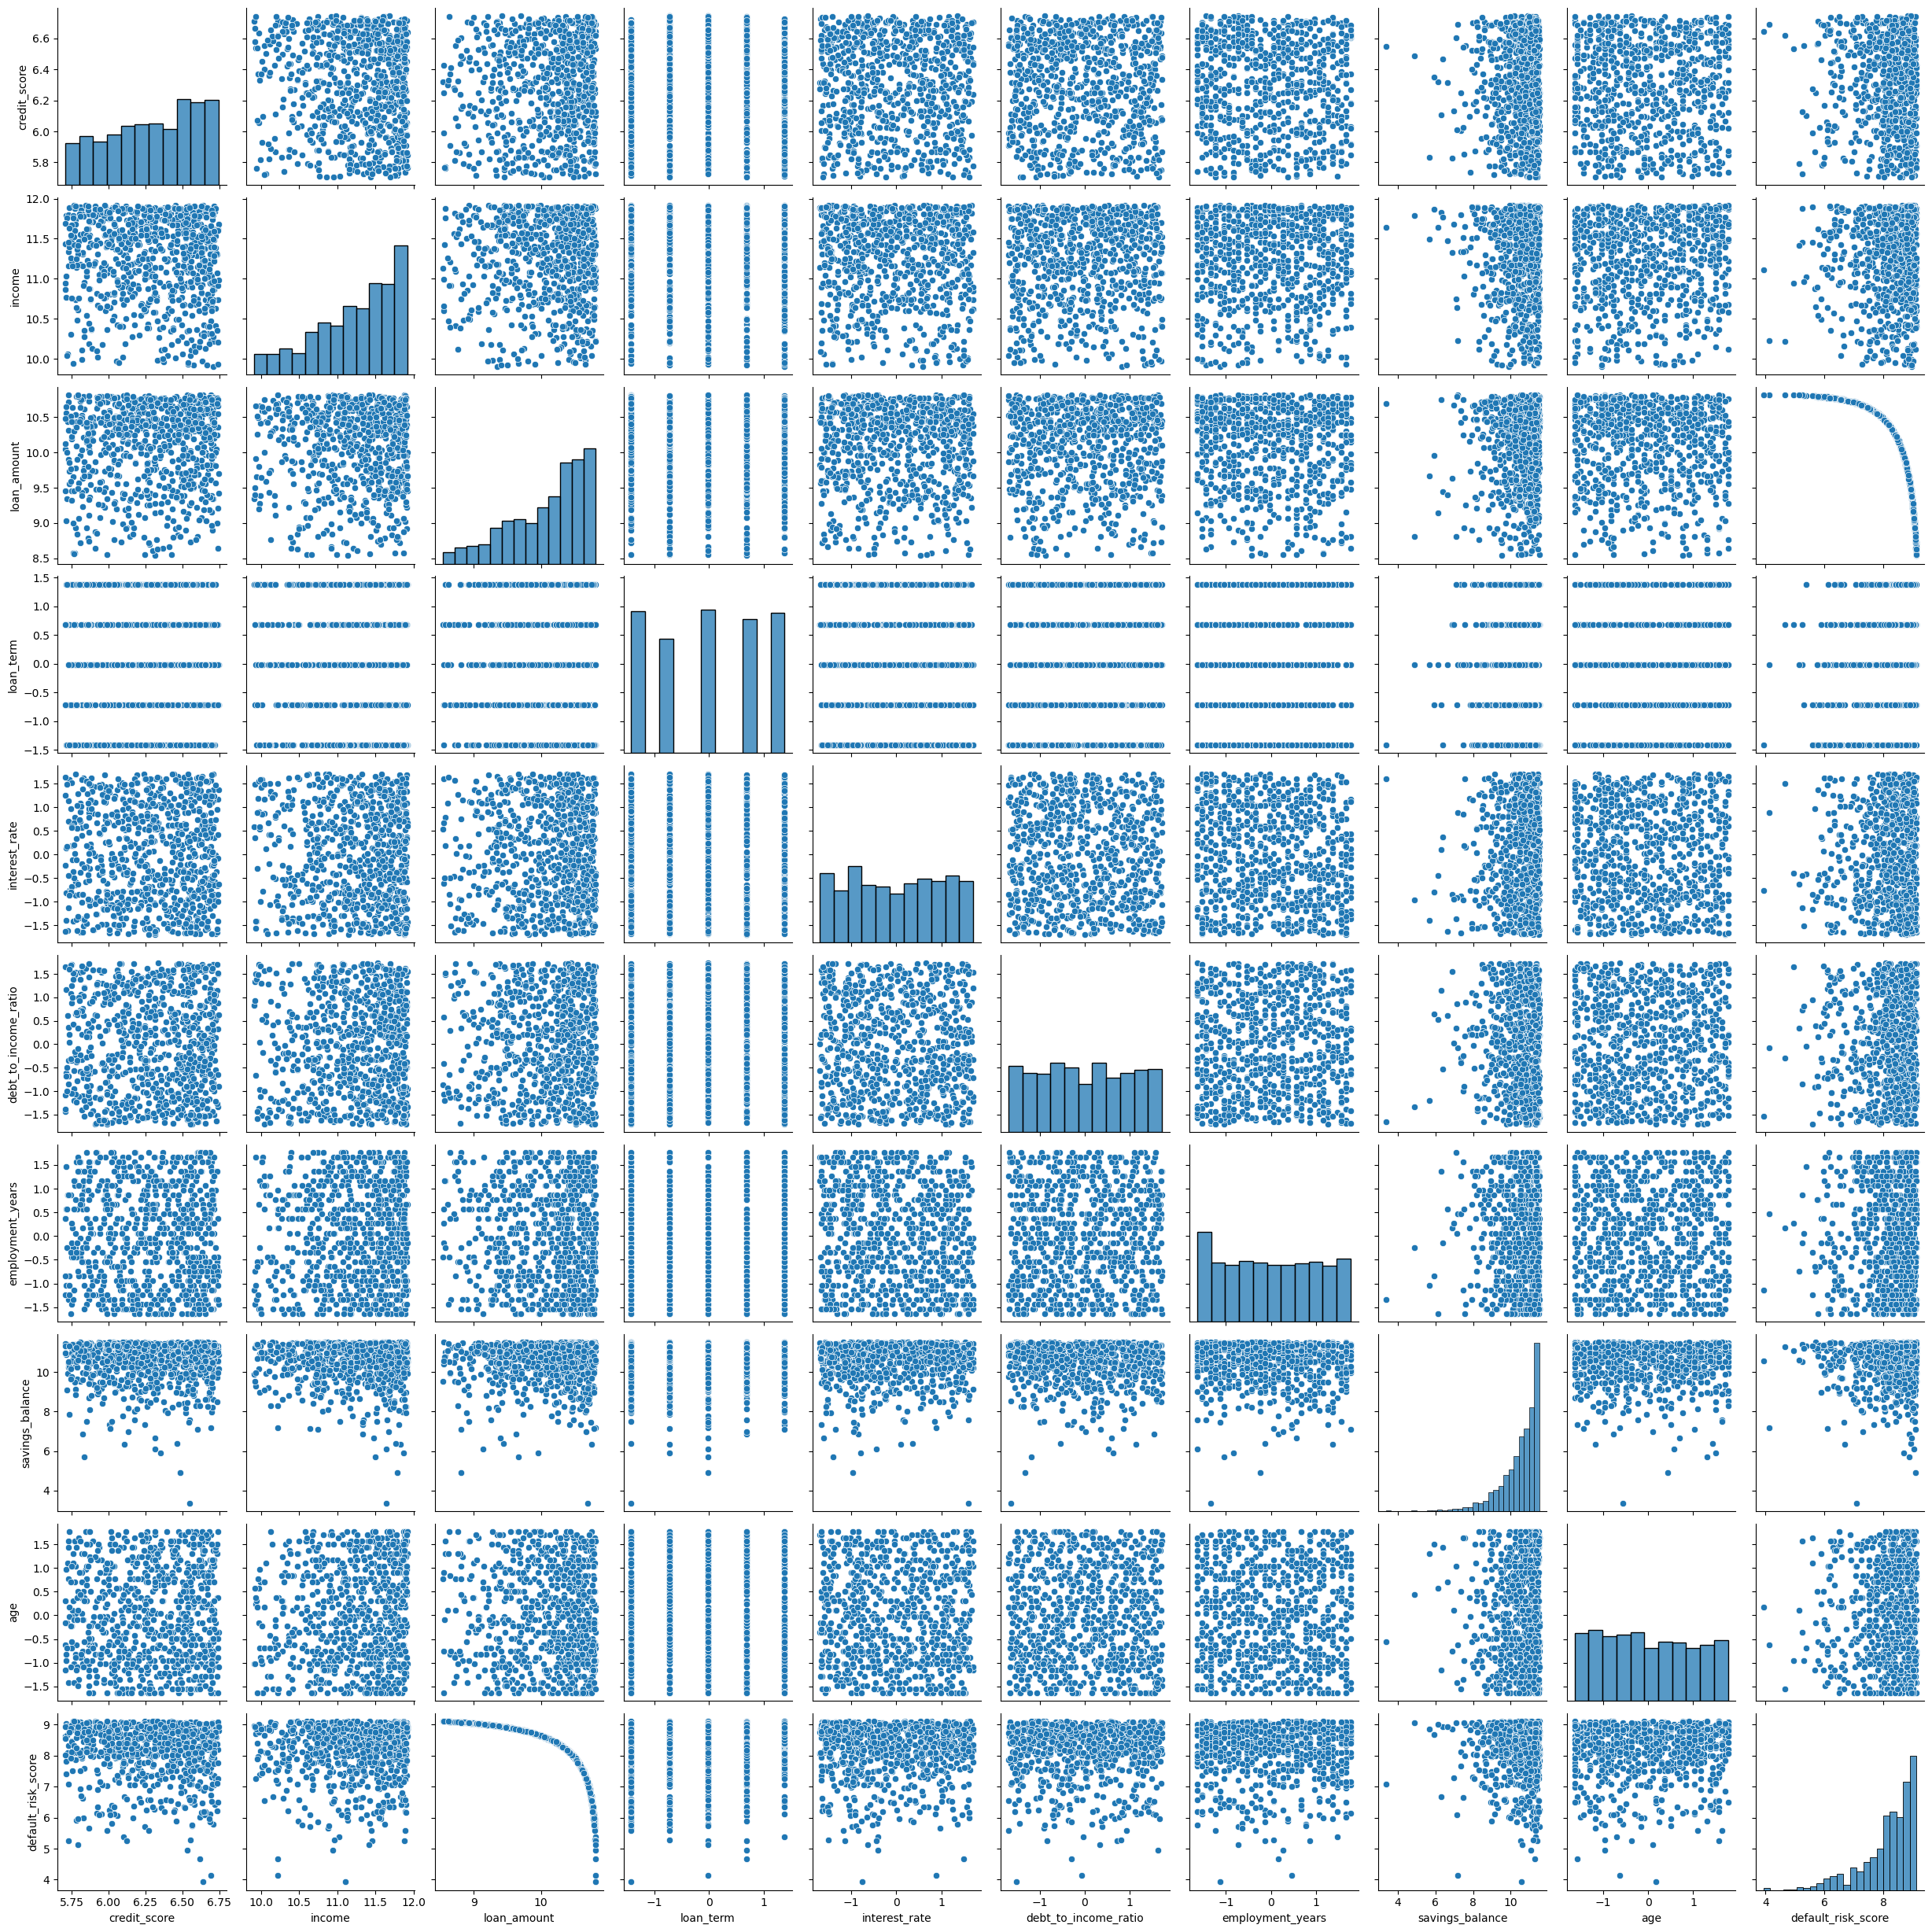

In [75]:
sns.pairplot(df);

In [ ]:
# df['income'].plot(kind='bar')

In [34]:
# Add constant column to X
X_const = sm.add_constant(X)  # Correctly adds an intercept term

# Fit OLS model with X_const (not X)
model = sm.OLS(y, X_const).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          3.62e-171
Time:                        14:46:47   Log-Likelihood:                -614.58
No. Observations:                 800   AIC:                             1249.
Df Residuals:                     790   BIC:                             1296.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.3885 

In [41]:
# ANOVA Model
model1 = ols('default_risk_score ~ credit_score + income + loan_amount + interest_rate + debt_to_income_ratio + employment_years + savings_balance + age', data=df).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)

print(anova_table)

                            sum_sq     df            F         PR(>F)
credit_score          1.962791e-01    1.0     0.706735   4.007838e-01
income                1.734355e-01    1.0     0.624483   4.296230e-01
loan_amount           3.866520e+02    1.0  1392.204396  1.469146e-176
interest_rate         1.294418e+00    1.0     4.660767   3.115949e-02
debt_to_income_ratio  3.980665e-07    1.0     0.000001   9.990451e-01
employment_years      2.066104e-02    1.0     0.074393   7.851153e-01
savings_balance       8.129139e-02    1.0     0.292703   5.886458e-01
age                   1.124781e-01    1.0     0.404996   5.247044e-01
Residual              2.196816e+02  791.0          NaN            NaN


In [37]:
# Add constant column to X.
X_const = sm.add_constant(X)  # Add constant column

df_vif = pd.DataFrame()
df_vif["feature"] = X_const.columns  # Use X_const columns
df_vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(df_vif)

                feature          VIF
0                 const  1362.689502
1          credit_score     1.014603
2                income     1.016353
3           loan_amount     1.009901
4             loan_term     1.005683
5         interest_rate     1.015067
6  debt_to_income_ratio     1.008122
7      employment_years     1.008087
8       savings_balance     1.012986
9                   age     1.008374


In [43]:
#Do another VIF test W/out constant
df_vif1 = pd.DataFrame()
df_vif1["feature"] = X.columns  # Use X_const columns
df_vif1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(df_vif1)

                feature         VIF
0          credit_score  299.484116
1                income  271.736563
2           loan_amount  259.830574
3             loan_term    1.005643
4         interest_rate    1.014989
5  debt_to_income_ratio    1.007904
6      employment_years    1.007913
7       savings_balance   93.780066
8                   age    1.006439


In [45]:
X= X.drop(columns= ['credit_score'], axis=1)

In [47]:
#Do second VIF test
df_vif2 = pd.DataFrame()
df_vif2["feature"] = X.columns  # Use X_const columns
df_vif2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(df_vif2)

                feature         VIF
0                income  207.297675
1           loan_amount  207.253094
2             loan_term    1.005619
3         interest_rate    1.014860
4  debt_to_income_ratio    1.007206
5      employment_years    1.007484
6       savings_balance   89.705000
7                   age    1.006338


In [49]:
X= X.drop(columns= ['income'], axis=1)

In [51]:
#Do third VIF test
df_vif3 = pd.DataFrame()
df_vif3["feature"] = X.columns  # Use X_const columns
df_vif3["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(df_vif3)

                feature        VIF
0           loan_amount  80.081225
1             loan_term   1.005522
2         interest_rate   1.014469
3  debt_to_income_ratio   1.005429
4      employment_years   1.007222
5       savings_balance  80.086970
6                   age   1.002953


In [54]:
X= X.drop(columns= ['savings_balance'], axis=1)

In [57]:
#Fourth VIF test
df_vif4 = pd.DataFrame()
df_vif4["feature"] = X.columns  # Use X_const columns
df_vif4["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(df_vif4)

                feature       VIF
0           loan_amount  1.000004
1             loan_term  1.003658
2         interest_rate  1.009538
3  debt_to_income_ratio  1.004734
4      employment_years  1.007180
5                   age  1.002762


In [60]:
X= df[df_vif4["feature"]]
X.head()

,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,age
0,9.386392,0.681250,-0.207798,1.159946,1.557692,1.036941
1,9.867446,-0.717980,-0.488593,-1.618244,1.657392,0.037078
2,10.584107,-0.018365,-0.038776,0.628062,-1.632716,-0.629497
3,10.154830,-0.018365,1.187997,0.307899,0.161888,0.370366
4,10.481561,-0.018365,-0.117835,1.411257,-1.034515,-0.029579


In [62]:
#Split into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [67]:
#Ridge regression with GridSearchCV
ridge= Ridge()
params= {"alpha": [0.1, 1, 10, 100]}
grid_search= GridSearchCV(ridge, params, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print("Best cross-validation MSE: ", -grid_search.best_score_)

#fit the model with best alpha
ridge_best= Ridge(alpha= grid_search.best_params_["alpha"])
ridge_best.fit(X_train, y_train)

#Random Forest
param_grid_rf= {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
rf= RandomForestRegressor()
grid_search_rf= GridSearchCV(rf, param_grid_rf, scoring="neg_mean_squared_error", cv=5)
grid_search_rf.fit(X_train, y_train)
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}")
rf_best= RandomForestRegressor(**grid_search_rf.best_params_)
rf_best.fit(X_train, y_train)

#Gradient Boosting Regressor with GridSearchCV
param_grid_gb= {"n_estimators": [100,200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
gb= GradientBoostingRegressor()
grid_search_gb= GridSearchCV(gb, param_grid_gb, scoring="neg_mean_squared_error", cv=5)
grid_search_gb.fit(X_train, y_train)
print(f"Best Params for GradientBoosting: {grid_search_gb.best_params_}")

#Fit the best params
gb_best= GradientBoostingRegressor(**grid_search_gb.best_params_)
gb_best.fit(X_train, y_train)

#Model evaluation
models= {"Ridge": ridge_best, "RandomForest": rf_best, "GradientBoosting": gb_best}
#Doing a for loop to extract the respective scores
for name, model in models.items():
    y_pred= model.predict(X_test)
    mse= mean_squared_error(y_test, y_pred)
    mape= mean_absolute_percentage_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2= r2_score(y_test, y_pred)
    print()
    print(f"{name} Model Performance:")
    print(f" MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-"*40)

Best Parameters: {'alpha': 0.1}
Best cross-validation MSE:  0.2939390306941674


<IPython.core.display.Javascript object>

Best Params for RandomForest: {'max_depth': 20, 'n_estimators': 100}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best Params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


<IPython.core.display.Javascript object>


Ridge Model Performance:
 MSE: 0.22
RMSE: 0.47
MAPE: 0.05
R2 Score: 0.63
----------------------------------------

RandomForest Model Performance:
 MSE: 0.00
RMSE: 0.05
MAPE: 0.00
R2 Score: 1.00
----------------------------------------

GradientBoosting Model Performance:
 MSE: 0.00
RMSE: 0.05
MAPE: 0.00
R2 Score: 1.00
----------------------------------------


In [70]:
#Saving the best model among the three
with open("gb_best.pkl", "wb") as file:
    pickle.dump(gb_best, file)

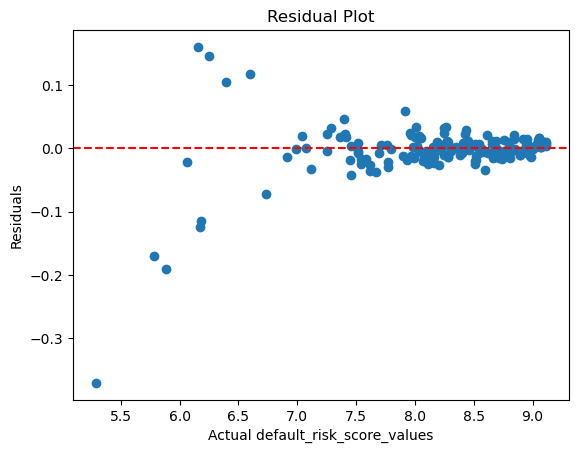

In [72]:
#Plot residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual default_risk_score_values")
plt.ylabel("Residuals")
plt.title("Residual Plot");